In [63]:
import pickle
import datetime as dt
import vis_methods as vs
import numpy as np

In [56]:
river_path = r'C:\Users\bpara\Geo data\Maxima result'

In [57]:
with open(river_path, 'rb') as f:
        miss_data = pickle.load(f)

In [58]:
miss_data.keys()

dict_keys(['lon', 'lat', 'maxima'])

In [104]:
def find_year(data, datakey, lat_i, lon_i, year):
    count = 0
    for year_i in data[datakey][lat_i][lon_i]:
        day = year_i[1]
        end = dt.datetime(year, 10, 1)
        start = dt.datetime(year, 9, 30)
        if day < end and day >= start:
            return count + 1
        count +=1

In [109]:
find_year(miss_data, "maxima", 0, 0, 2019)

In [106]:
def map_year(data, datakey, year):
    result = dict()
    result["lat"] = data["lat"]
    result["lon"] = data["lon"]
    result["position"] = []
    
    for lat_i in range(len(data["lat"])):
        row = []
        for lon_i in range(len(data["lon"])):
            row.append(find_year(data, datakey, lat_i, lon_i, year))
        result["position"].append(row)
    return result

In [107]:
flood_rank03 = map_year(miss_data, "maxima", 2003)
flood_rank19 = map_year(miss_data, "maxima", 2019)

In [70]:
file = open("flood rank", "wb")
pickle.dump(flood_rank, file)
file.close()

0
223


TypeError: '<=' not supported between instances of 'NoneType' and 'NoneType'

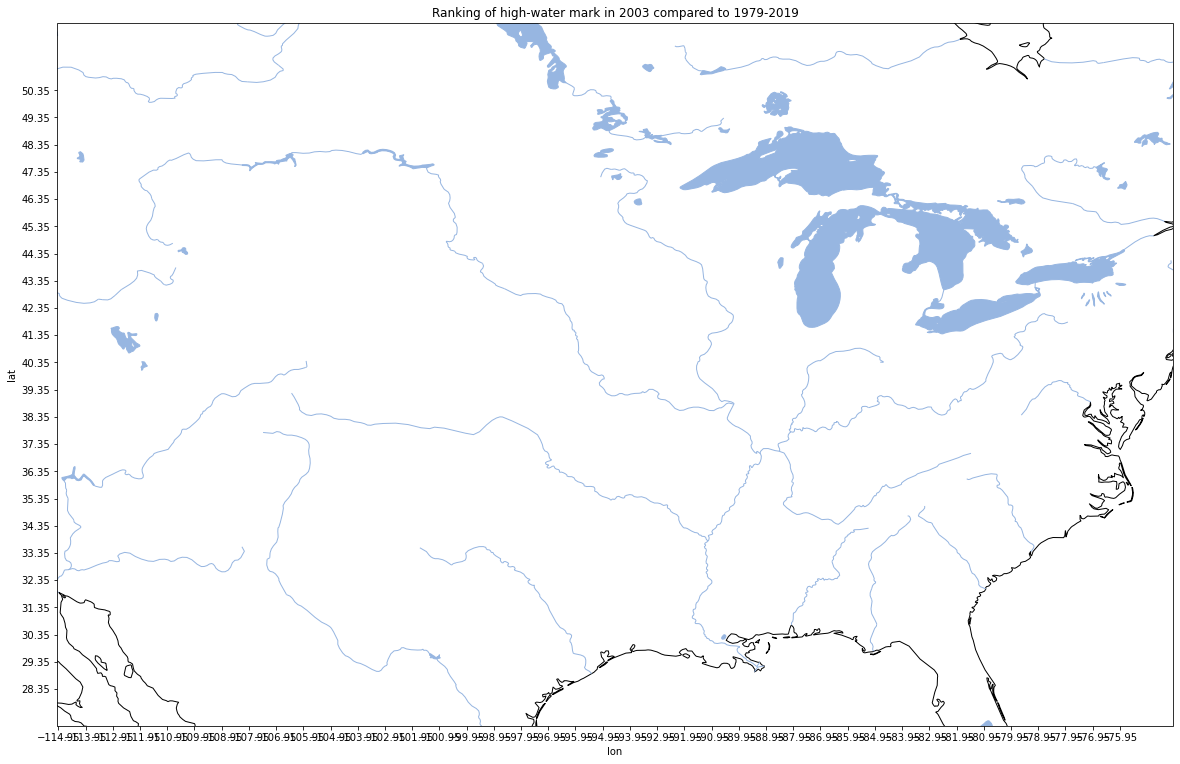

In [108]:
vs.plot_data(flood_rank03["lon"], flood_rank03["lat"], np.asarray(flood_rank03["position"]), "Flood ranking", "Ranking of high-water mark in 2003 compared to 1979-2019",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_rivers = True)

0
223


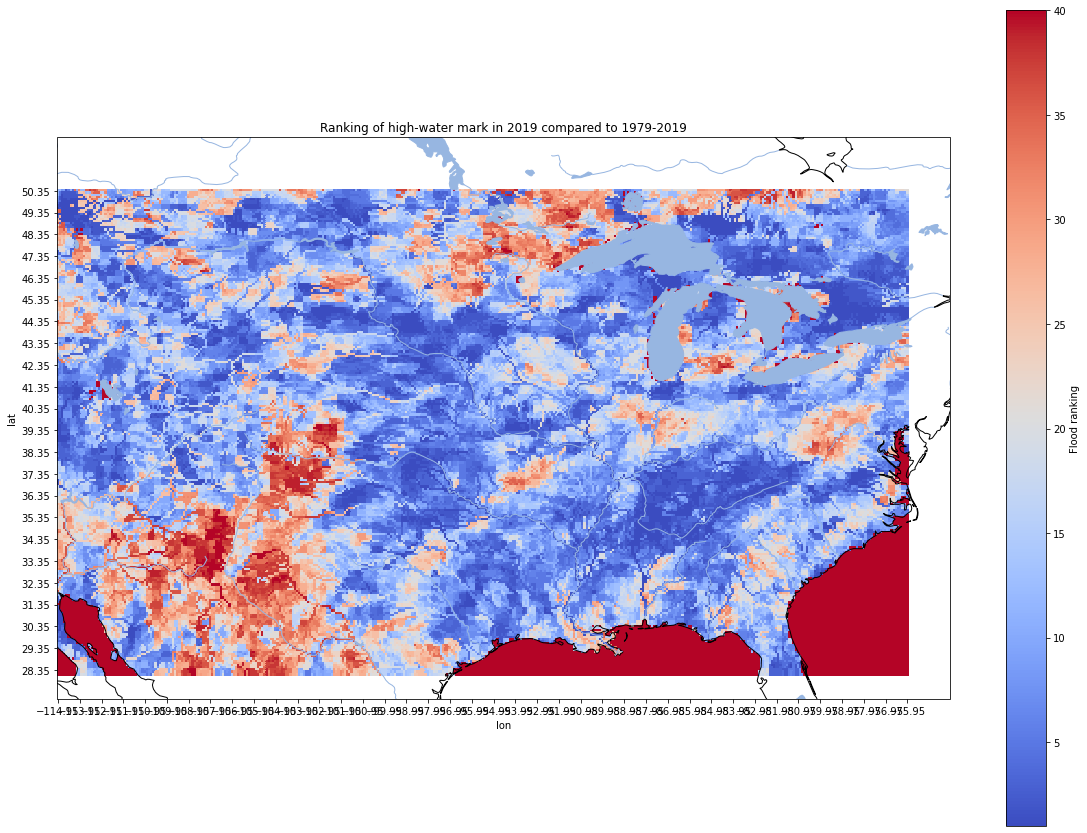

In [77]:
vs.plot_data(flood_rank19["lon"], flood_rank19["lat"], np.asarray(flood_rank19["position"]), "Flood ranking", "Ranking of high-water mark in 2019 compared to 1979-2019",
         lon_min =-115 , lon_max=-74, lat_min =51 , lat_max =27, has_rivers = True)